# Regularized Logistic Regression Project

This project aims to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Assuming that I am the product manager of the factory and I have the test results for some microchips on two different tests.
- From these two tests, you would like to determine whether the microchips should be accepted or rejected.
- To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.


Import useful Libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from public_tests import *
from test_utils import *
import copy
import math

We load the data from our folder and visualize it for better understanding

In [3]:
X_train, y_train = load_data("data/ex2data2.txt")

In [7]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

print('\n')

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

print('\n')

print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))



X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>


y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


Visualizing

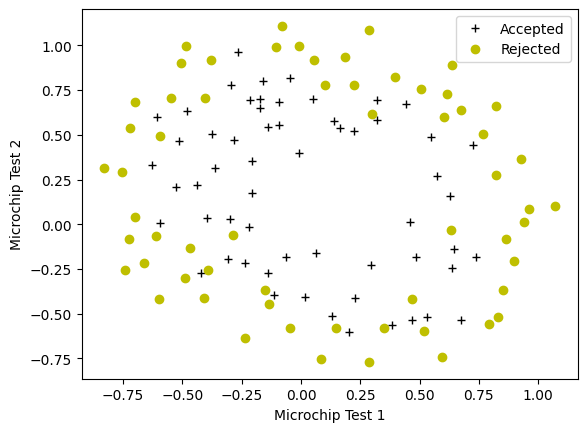

In [8]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

By plotting, we now understand that this type of data can't be separated by a linear straight fit. Instead, we have to go for a non-linear boundary, possibly circular

**Feature Mapping**

One way to fit the data better is to create more features from each data point. Through a pre-defined function, we will map the features into all polynomial terms of x1 and x2 up to the sixth power.

![alt text](Map_Feature.png)

In [9]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [10]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


We added more features but now our model is more vulnerable to overfitting. Hence, we introduce **Regularization** to solve the problem.

**Regularized Logistic Regression Cost Function**

![alt text](Regularized_Logistic_Regression_Cost_Function.png)

An extra Regularization term at the end is added

In [20]:
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """
    # m number of examples & n number of features
    m, n = X.shape 
    
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sig(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m
    
    return total_cost

In [21]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # You need to calculate this value
    reg_cost = 0.
    
    reg_cost = sum(np.square(w))
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

checking our implementation of the regularized logistic regression equation

In [22]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

# UNIT TEST    
compute_cost_reg_test(compute_cost_reg)

Regularized cost : 0.6618252552483948
All tests passed!


**Gradient Descent for Regularized Logistic Regression**

![alt text](GD_Regularized_LR.png)

**Parameter Update Equations**

![alt text](Parameter_Update_Equations.png)

In [28]:
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sig(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
            
    return dj_db, dj_dw

In [29]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]
        
    return dj_db, dj_dw

Checking our Regularized Gradient Descent implementation

In [30]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280122, 0.0536273463274574, 0.003140278267313462]
All tests passed!


Learning most optimal values of parameters **w** and **b**

In [32]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [37]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 100000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 10000: Cost     0.45   
Iteration 20000: Cost     0.40   
Iteration 30000: Cost     0.38   
Iteration 40000: Cost     0.37   
Iteration 50000: Cost     0.36   
Iteration 60000: Cost     0.36   
Iteration 70000: Cost     0.35   
Iteration 80000: Cost     0.35   
Iteration 90000: Cost     0.35   
Iteration 99999: Cost     0.35   


Text(0, 0.5, 'Cost')

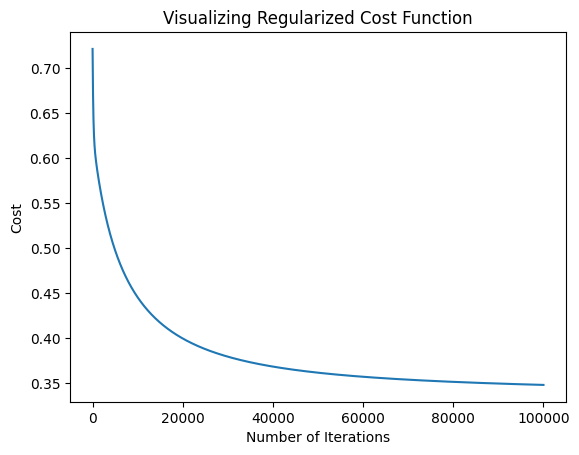

In [38]:
plt.plot(range(iterations), J_history)
plt.title("Visualizing Regularized Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

**Plotting the Decision Boundary**

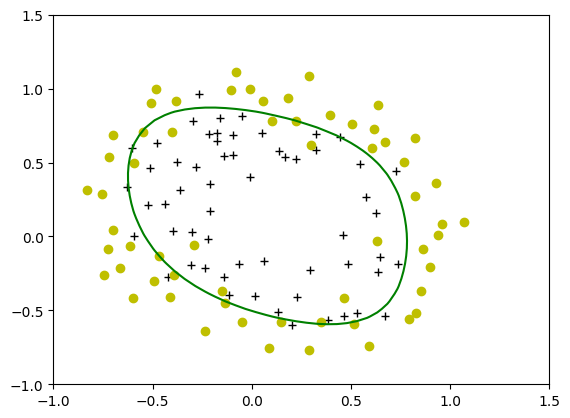

In [39]:
plot_decision_boundary(w, b, X_mapped, y_train)

**Checking Prediction Accuracy**

In [42]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    # Looping over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Looping over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculating the prediction 
        f_wb = sig(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0
        
    return p

In [43]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 83.898305
